In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch_geometric.loader import DataLoader

from exploration.dataset import PyGAcademicGraph

from utils import train, evaluate, plot_MSE_scores

from exploitation.models import LinearRegression

NUM_EXPERIMENTS = 10

In [2]:
batch_size = 1

# train dataset
train_dataset = PyGAcademicGraph(split="train", setting="transductive")
train_dataloader = DataLoader(train_dataset, batch_size=batch_size)

# val dataset
val_dataset = PyGAcademicGraph(split="val", setting="transductive")
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

# test dataset
test_dataset = PyGAcademicGraph(split="test", setting="transductive")
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# number of features
n_features = train_dataset[0].x.shape[1]

print("Number of samples in the train dataset: ", len(train_dataset))
print("Number of samples in the val dataset: ", len(test_dataset))
print("Number of samples in the test dataset: ", len(test_dataset))
print("Output of one sample from the train dataset: ", train_dataset[0])
print("Edge_index :")
print(train_dataset[0].edge_index)
print("Number of features per node: ", n_features)

Number of samples in the train dataset:  9
Number of samples in the val dataset:  9
Number of samples in the test dataset:  9
Output of one sample from the train dataset:  Data(edge_index=[2, 36936], y=[359], x=[359, 8], edge_attr=[36936, 3], domain='Academia', train_mask=[359], val_mask=[359], test_mask=[359], mask=[359])
Edge_index :
tensor([[  0,   0,   0,  ..., 357, 358, 358],
        [  1,  89, 121,  ..., 352,  89, 358]])
Number of features per node:  8


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("\nDevice: ", device)

num_epochs = 500
all_best_models = []
all_epoch_lists = []
all_MSEs = []
for _ in range(NUM_EXPERIMENTS):
    linear_regression = LinearRegression(
        input_size=n_features,
        output_size=1).to(device)

    loss_fcn = nn.MSELoss()
    optimizer = torch.optim.Adam(linear_regression.parameters(), lr=0.005)
    epoch_list, MSEs, best_model = train(linear_regression, loss_fcn, device, optimizer, num_epochs, train_dataloader, val_dataloader)
    all_best_models.append(best_model)
    all_epoch_lists.append(epoch_list)
    all_MSEs.append(MSEs)


Device:  cpu
Epoch 00001 | Loss: 0.1475
MSE: 0.1496
Epoch 00002 | Loss: 0.1431
Epoch 00003 | Loss: 0.1425
Epoch 00004 | Loss: 0.1416
Epoch 00005 | Loss: 0.1407
Epoch 00006 | Loss: 0.1407
MSE: 0.1454
Epoch 00007 | Loss: 0.1402
Epoch 00008 | Loss: 0.1393
Epoch 00009 | Loss: 0.1386
Epoch 00010 | Loss: 0.1374
Epoch 00011 | Loss: 0.1357
MSE: 0.1419
Epoch 00012 | Loss: 0.1327
Epoch 00013 | Loss: 0.1247
Epoch 00014 | Loss: 0.0713
Epoch 00015 | Loss: 0.0376
Epoch 00016 | Loss: 0.0341
MSE: 0.0306
Epoch 00017 | Loss: 0.0310
Epoch 00018 | Loss: 0.0293
Epoch 00019 | Loss: 0.0277
Epoch 00020 | Loss: 0.0265
Epoch 00021 | Loss: 0.0264
MSE: 0.0234
Epoch 00022 | Loss: 0.0264
Epoch 00023 | Loss: 0.0261
Epoch 00024 | Loss: 0.0256
Epoch 00025 | Loss: 0.0254
Epoch 00026 | Loss: 0.0257
MSE: 0.0228
Epoch 00027 | Loss: 0.0263
Epoch 00028 | Loss: 0.0271
Epoch 00029 | Loss: 0.0281
Epoch 00030 | Loss: 0.0274
Epoch 00031 | Loss: 0.0292
MSE: 0.0401
Epoch 00032 | Loss: 0.0295
Epoch 00033 | Loss: 0.0334
Epoch 00034

MSE of linear regression-0 on the test set: 0.0219
MSE of linear regression-1 on the test set: 0.0201
MSE of linear regression-2 on the test set: 0.0221
MSE of linear regression-3 on the test set: 0.2327
MSE of linear regression-4 on the test set: 0.0221
MSE of linear regression-5 on the test set: 0.2327
MSE of linear regression-6 on the test set: 0.0195
MSE of linear regression-7 on the test set: 0.0220
MSE of linear regression-8 on the test set: 0.0230
MSE of linear regression-9 on the test set: 0.0222
OVERALL: MSE of linear regression on the test set: 0.0221


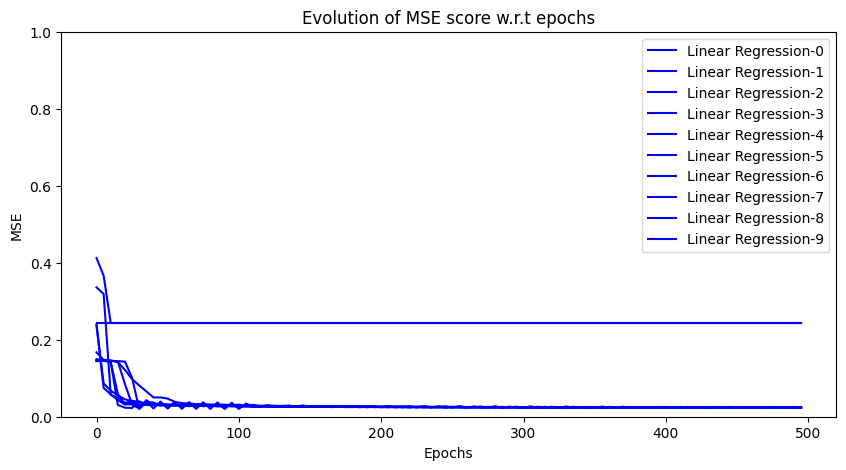

In [7]:
all_MSE_tests = []
for i in range(NUM_EXPERIMENTS):
    MSE_test = evaluate(all_best_models[i], loss_fcn, device, test_dataloader)
    print(f"MSE of linear regression-{i} on the test set: {MSE_test:.4f}")
    all_MSE_tests.append(MSE_test)
print("OVERALL: MSE of linear regression on the test set: {:.4f}".format(np.median(np.array(all_MSE_tests))))

plot_MSE_scores(all_epoch_lists, all_MSEs, model_name="Linear Regression")